# Анализ бизнес-показателей приложения, поиск причин убытков  
<a id='start'></a>

# Содержание  
1. [Задача и описание данных](#stage_1)
2. [План исследования](#stage_2)
3. [Загрузка данных и подготовка их к анализу](#stage_3)  
    3.1. [Вывод](#stage3_)
4. [Определение функций для расчета и анализа LTV, ROI, удержания и конверсии](#stage_4) 
5. [Исследовательский анализ данных](#stage_5)  
    5.1. [Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?](#stage5_1)  
    5.2. [Какими устройствами пользуются посетители? С каких устройств чаще всего заходят платящие пользователи?](#stage5_2)  
    5.3. [По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?](#stage5_3)  
    5.4. [Вывод](#stage5_4)  
6. [Маркетинг](#stage_6)  
    6.1. [Вывод](#stage6_)  
7. [Оценка окупаемости рекламы для привлечения пользователей](#stage_7)  
    7.1. [Проанализируем общую окупаемость рекламы](#stage7_1)  
    7.2. [Проанализируем окупаемость рекламы с разбивкой по устройствам](#stage7_2)  
    7.3. [Проанализируем окупаемость рекламы с разбивкой по странам](#stage7_3)  
    7.4. [Проанализируем окупаемость рекламы с разбивкой по рекламным каналам](#stage7_4)   
    7.5. [Вывод](#stage7_5)
8. [Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам](#stage_8)      
    8.1. [Вывод](#stage8_1)  
9. [Общие выводы](#stage_9)    


### Задача и описание данных:   
<a id='stage_1'></a>

Нужно провести маркетинговое исследование для развлекательного приложения. Несколько прошлых месяцев компания постоянно несла убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нужно разобраться в причинах этой ситуации.

Есть следующая информация: 

    - лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27 
    - выгрузка покупок за этот период 
    - статистика рекламных расходов 

Предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

Описание данных:  
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день
  

### План исследования :   
<a id='stage_2'></a>

[к содержанию](#start)

1. Загрузить данные и подготовить их к анализу
 
2. Определить функции для расчета и анализа LTV, ROI, удержания и конверсии

3. Провести исследовательский анализ данных, выяснить:

        - Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
        - Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
        - По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?


4. Маркетинг:

        - Сколько денег потратили? Всего / на каждый источник / по времени
        - Сколько в среднем стоило привлечение одного покупателя из каждого источника?


5. Оценить окупаемость рекламы для привлечения пользователей с помощью LTV и ROI:

        - Проанализировать общую окупаемость рекламы;
        - Проанализировать окупаемость рекламы с разбивкой по устройствам;
        - Проанализировать окупаемость рекламы с разбивкой по странам;
        - Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.


6. Выводы

        - Выделить причины неэффективности привлечения пользователей;
        - Сформировать рекомендации для отдела маркетинга для повышения эффективности.

### Загрузка данных и подготовка их к анализу  
<a id='stage_3'></a>
[к содержанию](#start)

In [1]:
# загрузим нужные библиотеки
from io import BytesIO
import requests

import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

Зададим переменные и загрузим в них имеющиеся у нас данные

In [2]:
spreadsheet_id = '1Q-jyn6Wkw6aaFQyA_iUHGXJdC_zDl0yCgfruuidTMRA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
visits = pd.read_csv(BytesIO(r.content)) # данные о сессиях / визитах

In [3]:
spreadsheet_id = '1MwNJ8YZIMFleBgy1riTB6TmeWBAvzwSkhUVoiz-6utU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
orders = pd.read_csv(BytesIO(r.content)) # данные о заказах

In [4]:
spreadsheet_id = '1ukh_6OQU8O0SqHIUiD6mwEshcSRR4X8M6zwMoQaDvBg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
costs = pd.read_csv(BytesIO(r.content)) #  данные о стоимости рекламы

Посмотрим на получившиеся датафреймы и информацию о данных в них

In [5]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропусков в данных нет, но столбцы именованы некорректно, время указано в неподходящем формате

In [11]:
# приведем названия столбцов датафреймов к "змеиному" регистру
visits = visits.rename(columns={'User Id': 'user_id', 'Session Start': 'session_start', 'Session End': 'session_end'})
visits.columns = visits.columns.str.lower()

orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt'})
orders.columns = orders.columns.str.lower()

costs.columns = costs.columns.str.lower()

In [12]:
# приведем типы данных со временем в датафреймах в нужный формат
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим, корректность именования столбцов и типов данных времени

In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Посмотрим, нет ли неявных дубликатов и аномалий в данных

In [16]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [17]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [18]:
sorted(visits['channel'].unique())

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds',
 'organic']

In [19]:
sorted(costs['channel'].unique())

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds']

Как видим, аномалий и неявных дубликатов нет. Каналы совпадают в visits и costs. Канал organic есть только в visits, что логично, т.к. на этот вид привлечения реклама не нужна.

Проверим есть ли явные дубликаты

In [20]:
visits.duplicated().sum()

0

In [21]:
orders.duplicated().sum()

0

In [22]:
costs.duplicated().sum()

0

Проверим нет ли отрицательных значений выручки и стоимости рекламы

In [23]:
orders.query('revenue < 0').count()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [24]:
costs.query('costs < 0').count()

dt         0
channel    0
costs      0
dtype: int64

#### Вывод:    
<a id='stage3_'></a>
Данные проверены на дубликаты и аномалии, пропусков нет, типы данных для столбцов с датами и временем изменены. Данные подготовлены к дальнейшему анализу.

### Определение функций для расчета и анализа LTV, ROI, удержания и конверсии  
<a id='stage_4'></a>
[к содержанию](#start)

In [25]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = (ad_costs['costs'] / ad_costs['unique_users']).round(2)

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [26]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [27]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [28]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [29]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [30]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [31]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [32]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных  
<a id='stage_5'></a>

[к содержанию](#start)

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Построим профили пользователей

In [33]:
profiles = get_profiles(visits, orders, costs)

In [34]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


Определим минимальную и максимальную дату привлечения пользователей

In [35]:
print(profiles['dt'].min())
print()
print(profiles['dt'].max())

2019-05-01

2019-10-27


Минимальная и максимальная даты привлечения пользователей совпадают с заданным периодом данных - с 2019-05-01 по 2019-10-27 

Напишем функцию для расчета доли платящих пользователей от общего количества пользователей по заданному параметру

In [36]:
def payer_part(df, dimensions): # задаем аргументы - датафрейм и параметр
    result = df.groupby(dimensions).agg({'user_id': 'nunique'}) # группируем по параметру и считаем число уникальных пользователей
    i = df.query('payer == True').groupby(dimensions).agg({'user_id': 'nunique'}) # то же самое только для платящих пользователей
    result = result.merge(i, on=dimensions, how='left').fillna(0) # объединяем таблицы по параметру, пропуски заменяем нулями
    result = result.rename(columns={'user_id_x': 'all_users', 'user_id_y': 'payers'}) # переименуем колонки
    result['payers_part'] = round((result['payers'] / result['all_users'] * 100), 2) # считаем долю платящих пользователей
    result = result.sort_values(by='payers_part', ascending=False) # сортируем по убыванию доли
    return result    

#### Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?  
<a id='stage5_1'></a>

[к содержанию](#start)

In [37]:
dimensions = ['region']
region_payer_part = payer_part(profiles, dimensions)
region_payer_part

,all_users,payers,payers_part
region,,,
United States,100002,6902,6.90
Germany,14981,616,4.11
UK,17575,700,3.98
France,17450,663,3.80


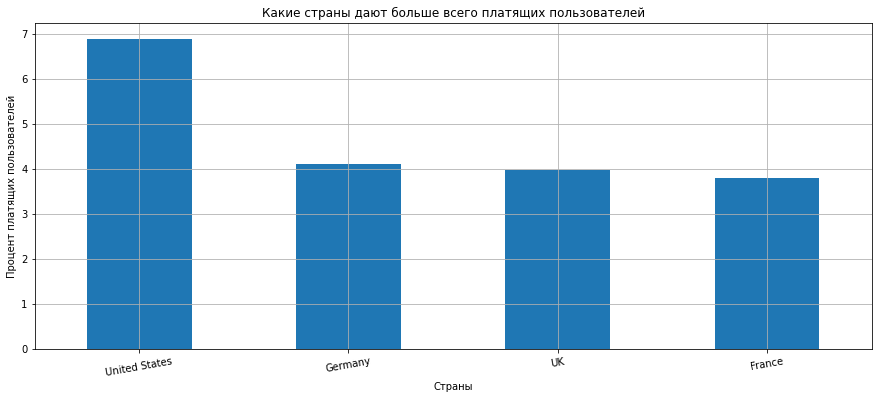

In [38]:
# визуализируем
(region_payer_part['payers_part']
     .plot(kind='bar', figsize=(15,6), rot=10, xlabel='Страны', ylabel='Процент платящих пользователей', legend=False, grid=True)
     .set_title('Какие страны дают больше всего платящих пользователей')
)
plt.show()

Пользователи приходят из США, Германии, Великобритании и Франции. Больше всего платящих пользователей дают США - 6,9%. Остальные страны дают приблизительно одинаковую долю платящих пользователей - от 3,8% до 4,11%.

#### Какими устройствами пользуются посетители? С каких устройств чаще всего заходят платящие пользователи?  
<a id='stage5_2'></a>

[к содержанию](#start)

In [39]:
dimensions = ['device']
device_payer_part = payer_part(profiles, dimensions)
device_payer_part

,all_users,payers,payers_part
device,,,
Mac,30042,1912,6.36
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05


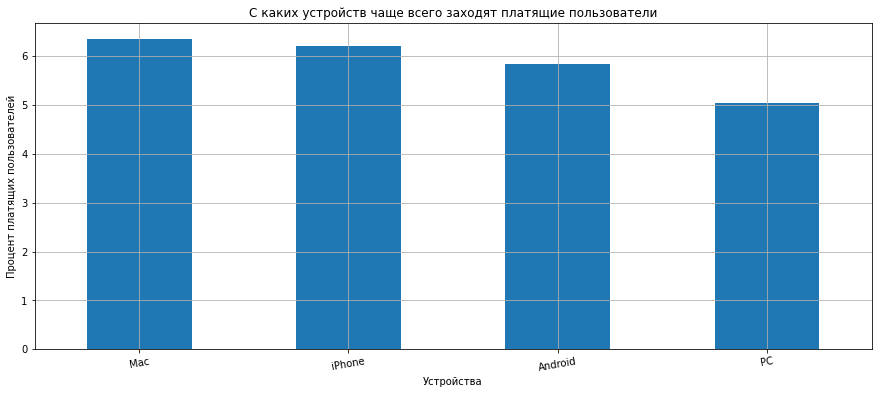

In [40]:
# визуализируем
(device_payer_part['payers_part']
     .plot(kind='bar', figsize=(15,6), rot=10, xlabel='Устройства', ylabel='Процент платящих пользователей', legend=False, grid=True)
     .set_title('С каких устройств чаще всего заходят платящие пользователи')
)
plt.show()

Чаще всего платящие пользователи заходят с Mac (6,36%), iPhone (6,21%) и Android (5,85%). PC пользуется меньшей популярностью среди платящих пользователей (5,05%).

#### По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?  
<a id='stage5_3'></a>

[к содержанию](#start)

In [41]:
dimensions = ['channel']
channel_payer_part = payer_part(profiles, dimensions)
channel_payer_part

,all_users,payers,payers_part
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


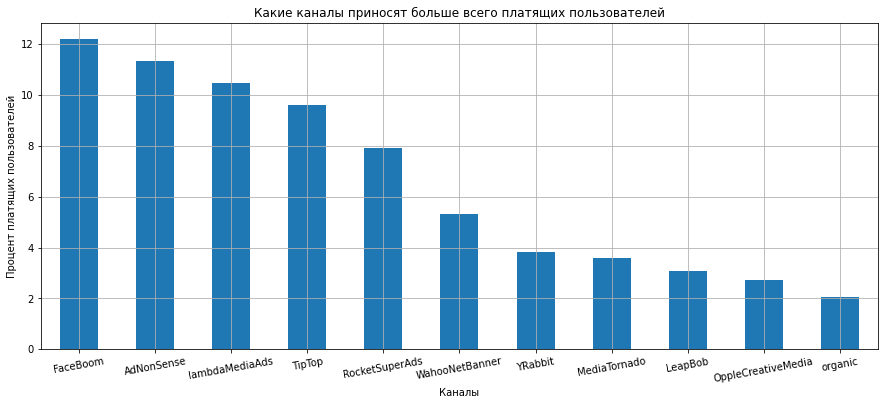

In [42]:
# визуализируем
(channel_payer_part['payers_part']
     .plot(kind='bar', figsize=(15,6), rot=10, xlabel='Каналы', ylabel='Процент платящих пользователей', legend=False, grid=True)
     .set_title('Какие каналы приносят больше всего платящих пользователей')
)
plt.show()

Больше всего платящих пользователей приносят следующие каналы: FaceBoom (12,2%), AdNonSense (11,34%), lambdaMediaAds (10,47%), TipTop (9,6%), RocketSuperAds (7,91%). Каналы WahooNetBanner, YRabbit, MediaTornado, LeapBob, OppleCreativeMedia и organic приносят от 5,3% до 2,06% платящих пользователей.

#### Вывод: 
<a id='stage5_4'></a>

Больше всего платящих пользователей дают США - 6,9%. Остальные страны (Германия, Великобритания и Франция) дают приблизительно одинаковую долю платящих пользователей - от 3,8% до 4,11%.

Похоже, что мобильное приложение более популярно и удобно для пользователей, поэтому и приносит больше платящих клиентов, чем приложение для PC. Чаще всего платящие пользователи заходят с Mac (6,36%), iPhone (6,21%) и Android (5,85%). Доля платящих пользователей на PC 5,05%.

Каналы FaceBoom (12,2%), AdNonSense (11,34%), lambdaMediaAds (10,47%), TipTop (9,6%), RocketSuperAds (7,91%) приносят больше всего платящих пользователей. Каналы WahooNetBanner, YRabbit, MediaTornado, LeapBob, OppleCreativeMedia и organic приносят от  5,3% до 2,06% платящих пользователей.

### Маркетинг

<a id='stage_6'></a>

[к содержанию](#start)

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Исключим органик, т.к. на этот канал не тратится рекламный бюджет

In [43]:
profiles = profiles.query('channel != "organic"') 

In [44]:
# сколько денег потратили всего на рекламу
profiles['acquisition_cost'].sum().round()

105501.0

In [45]:
# сколько денег потратили на каждый источник - в процентах
channel_cost = profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending=False)
channel_cost['cost_%'] = (channel_cost['acquisition_cost'] / channel_cost['acquisition_cost'].sum() * 100).round(2)
channel_cost

,acquisition_cost,cost_%
channel,,
TipTop,54751.59,51.90
FaceBoom,32452.29,30.76
WahooNetBanner,5149.78,4.88
AdNonSense,3909.18,3.71
OppleCreativeMedia,2154.71,2.04
RocketSuperAds,1830.77,1.74
LeapBob,1797.89,1.70
lambdaMediaAds,1557.40,1.48
MediaTornado,954.33,0.90


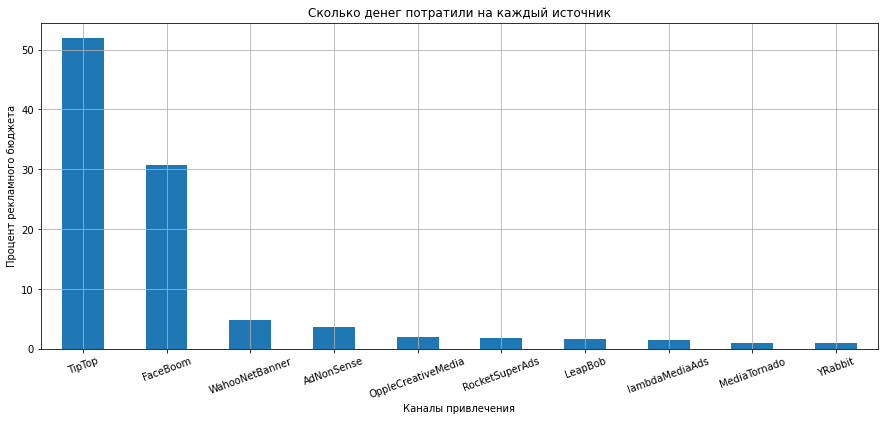

In [46]:
# сколько денег потратили на каждый источник - визуализация
(channel_cost['cost_%']
    .plot(kind='bar', legend=False, figsize=(15, 6), rot=20, xlabel='Каналы привлечения', ylabel='Процент рекламного бюджета', grid=True)
    .set_title('Сколько денег потратили на каждый источник') 
)
plt.show()

Есть явные лидеры по расходам - на канал TipTop потрачено 51,9% рекламного бюджета, на FaceBoom - 30,76%. Остальные 8 каналов не дотягивают до 5% каждый.

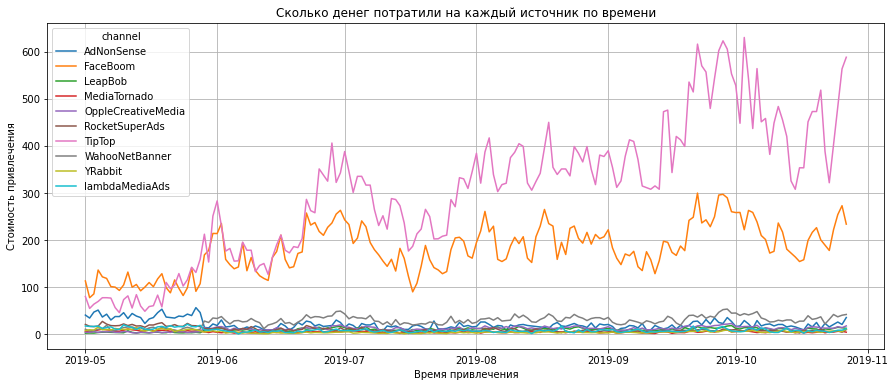

In [47]:
# сколько денег потратили на каждый источник по времени
(profiles
 .pivot_table(
    index = 'dt',
    columns = 'channel',
    values = 'acquisition_cost',
    aggfunc = 'sum'
).plot(figsize=(15, 6), grid=True, xlabel='Время привлечения', ylabel='Стоимость привлечения')
 .set_title('Сколько денег потратили на каждый источник по времени')
)
plt.show()

По времени мы также видим постепенное увеличение рекламного бюджета для каналов TipTop и  FaceBoom, причем в них изначально вкладывалось больше средств, чем в другие каналы привлечения. 

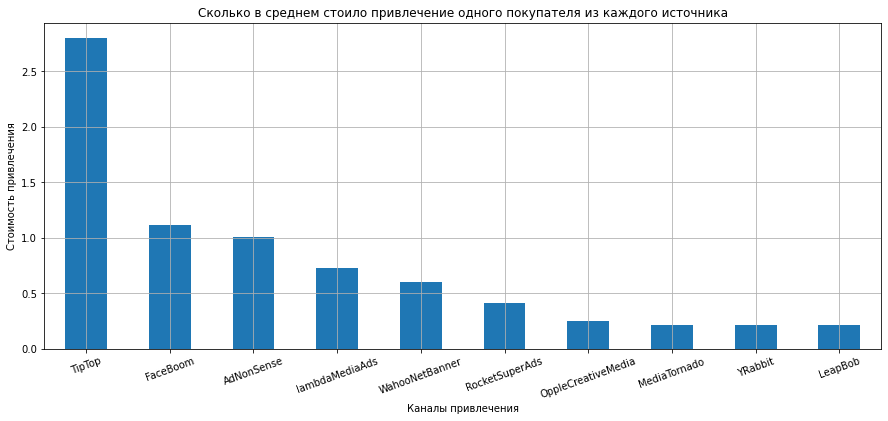

In [48]:
# сколько в среднем стоило привлечение одного покупателя из каждого источника - визуализация
(profiles
    .groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)
    .plot(kind='bar', legend=False, figsize=(15, 6), rot=20, xlabel='Каналы привлечения', ylabel='Стоимость привлечения', grid=True)
    .set_title('Сколько в среднем стоило привлечение одного покупателя из каждого источника') 
)
plt.show()

In [49]:
# сколько в среднем стоило привлечение одного покупателя из каждого источника - в цифрах
(profiles
    .groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False).round(2)
)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
MediaTornado,0.22
YRabbit,0.22


In [50]:
# сколько в среднем стоило привлечение одного покупателя для всей кампании 
profiles['acquisition_cost'].median()

1.08

Лидер по средней стоимости привлечения одного покупателя - канал TipTop, стоимость для него составила 2,8. Далее идут FaceBoom (1,11) и AdNonSense (1,01), стоимость привлечения одного покупателя для остальных каналов составила от 0,21 до 0,72.

#### Вывод: 
<a id='stage6_'></a>

Мы выявили явных лидеров по расходам рекламного бюджета. На канал TipTop потрачено 51,9% рекламного бюджета, на FaceBoom - 30,76%. Остальные 8 каналов не дотягивают до 5% каждый.

Мы также видим постепенное увеличение рекламного бюджета по времени для каналов TipTop и FaceBoom, причем в них изначально вкладывалось больше средств, чем в другие каналы привлечения.

По средней стоимости привлечения одного покупателя лидер - канал TipTop, стоимость для него составила 2,8. Далее идут FaceBoom (1,11) и AdNonSense (1,01), стоимость привлечения одного покупателя для остальных каналов составила от 0,21 до 0,72.

Итак, самые затратные и дорогие каналы привлечения - TipTop и FaceBoom. За ними следуют AdNonSense, lambdaMediaAds и WahooNetBanner. Надо проверить, окупаются ли вложения в рекламу.

### Оценка окупаемости рекламы для привлечения пользователей  
<a id='stage_7'></a>

[к содержанию](#start)

Установим момент и горизонт анализа данных. Учтем, что мы смотрим данные 1-го ноября 2019 года, и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [51]:
observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14 # горизонт анализа 

#### Проанализируем общую окупаемость рекламы
<a id='stage7_1'></a>

[к содержанию](#start)

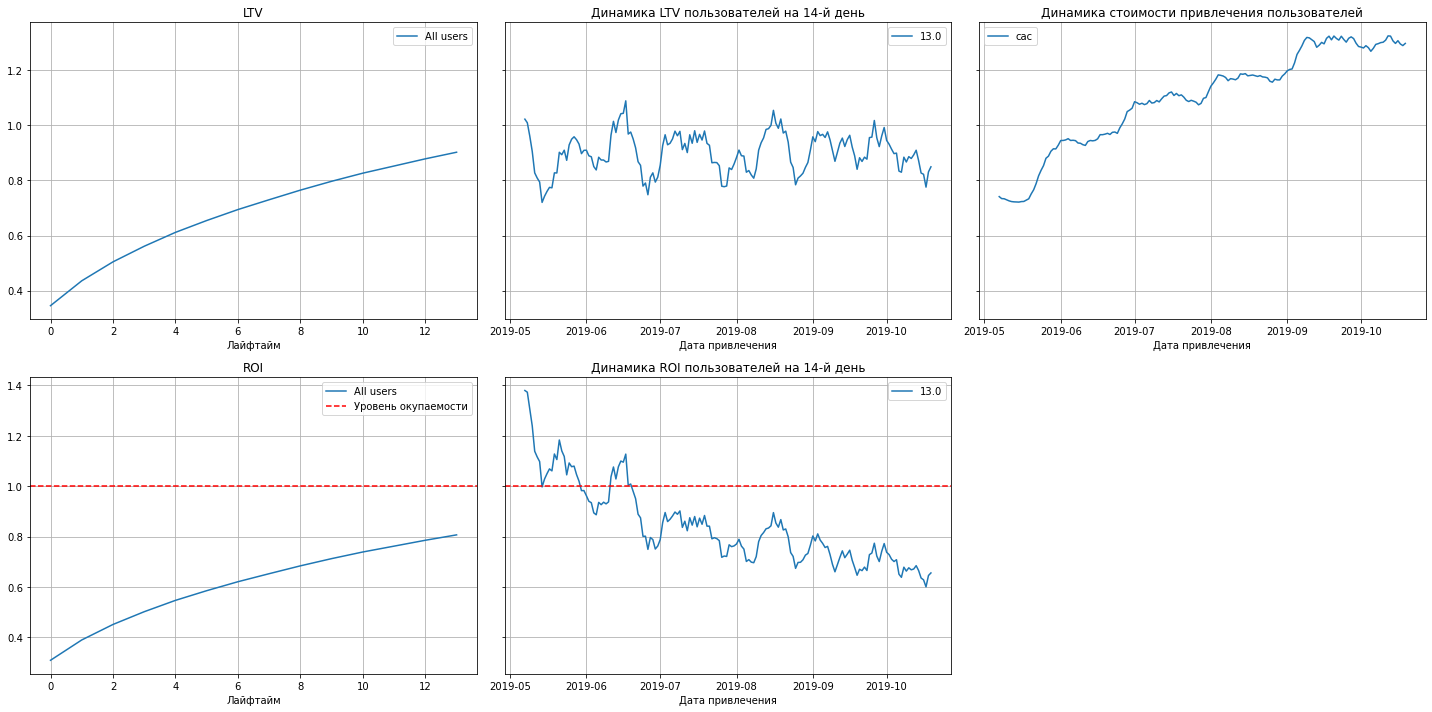

In [52]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

LTV стабильно растет, тут все неплохо. 

Стоимость привлечения тоже растет, значит рекламный бюджет постоянно приходится увеличивать. 

Окупаемость инвестиций низкая, чуть выше 80%, причем в динамике она снижается пропорционально увеличению стоимости привлечения. Значит, объем продаж растет недостаточно быстро, чтобы реклама окупалась.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам
<a id='stage7_2'></a>

[к содержанию](#start)

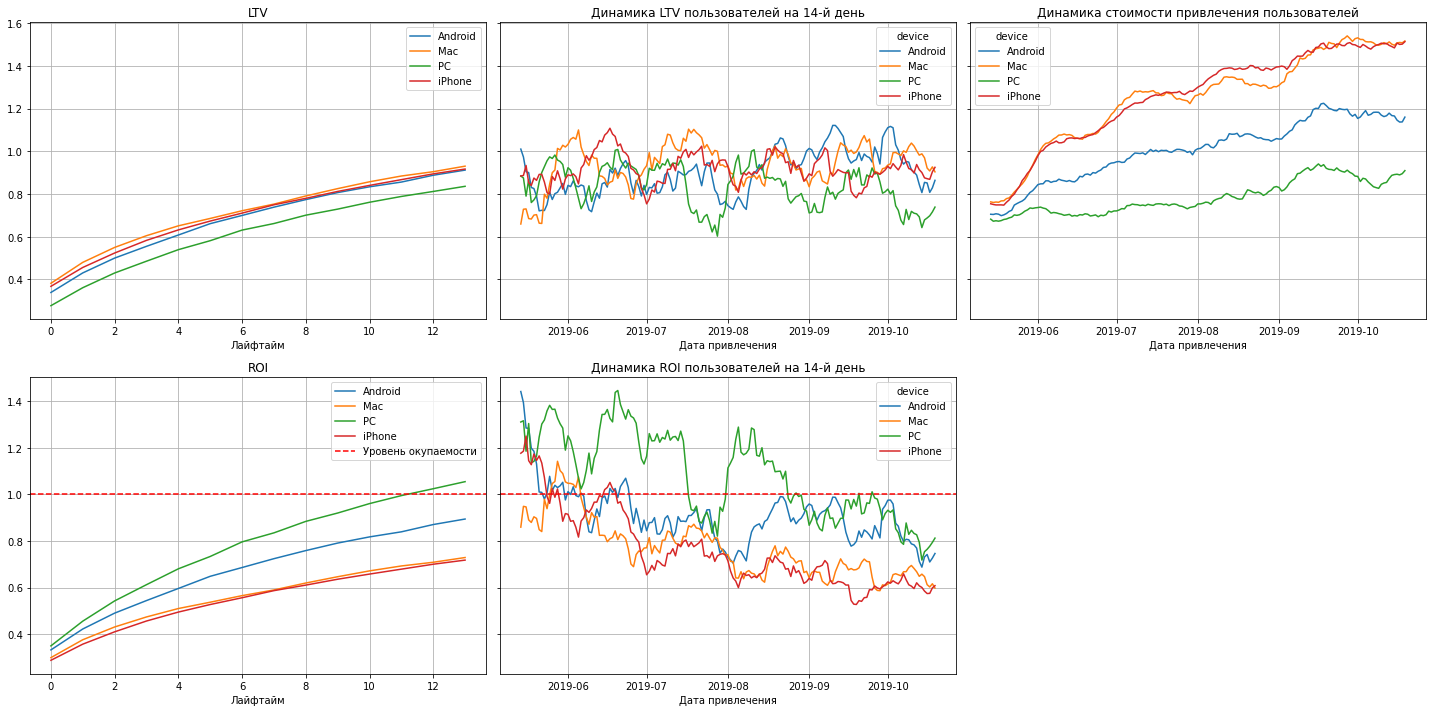

In [53]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

LTV стабилен для всех устройств, самый низкий для PC. 

Стоимость привлечения для iPhone и Mac растет быстрее всего, у Android средняя стоимость привлечения, а у PC - самая низкая, причем растет медленнее остальных. 

Выше уровня окупаемости поднимается лишь PC, остальные устройства ниже уровня окупаемости. Это подтверждает и динамика ROI, хотя в начале периода наблюдения были моменты, когда мобильные устройства тоже окупались, а к концу периода наблюдения все устройства, включая РС, опустились ниже уровня окупаемости.

#### Проанализируем окупаемость рекламы с разбивкой по странам
<a id='stage7_3'></a>

[к содержанию](#start)

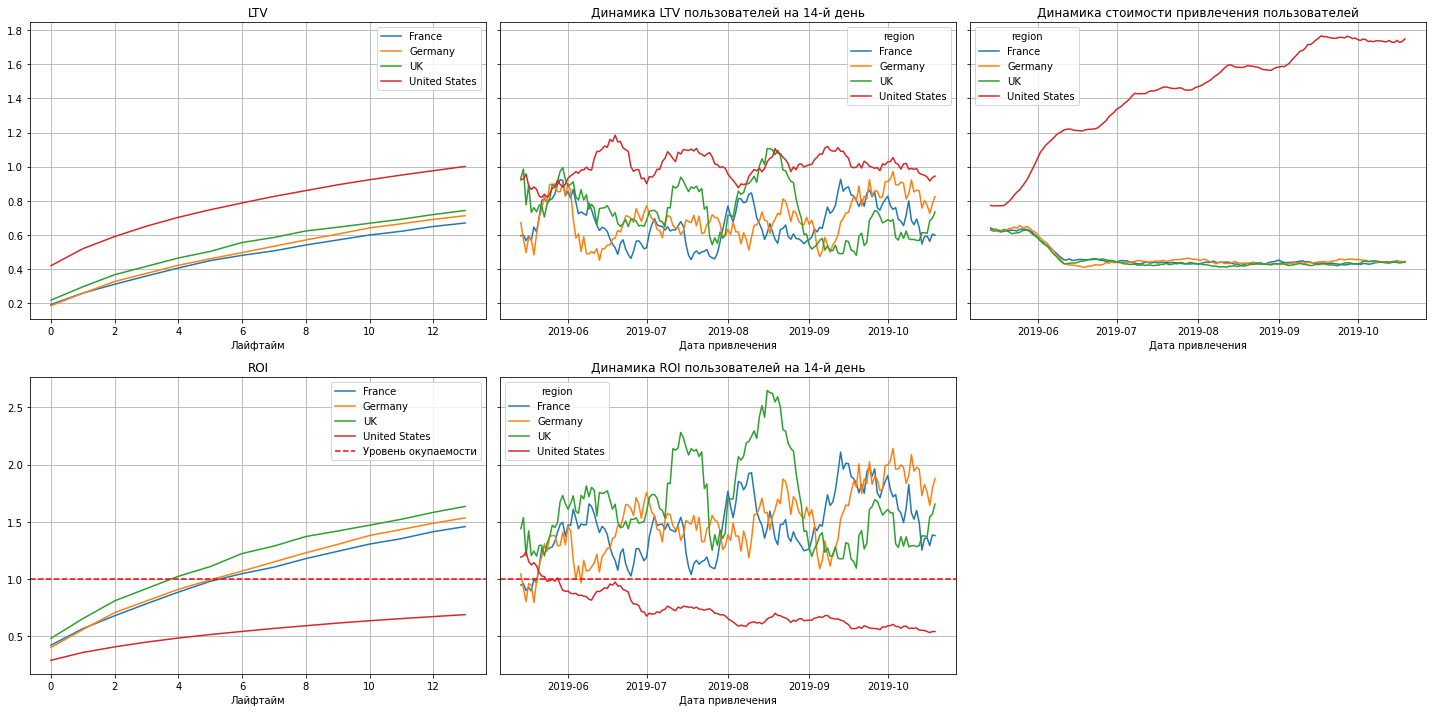

In [54]:
# смотрим окупаемость с разбивкой по странам
dimensions = ['region']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Похоже, проблема в рекламной кампании для United States, т.к. хотя в нем самый высокий LTV, именно этот регион не окупается, т.к. стоимость привлечения в нем значительно растет. Остальные регионы (Великобритания, Германия и Франция) окупаются и показывают себя неплохо и достаточно стабильно по всем показателям.

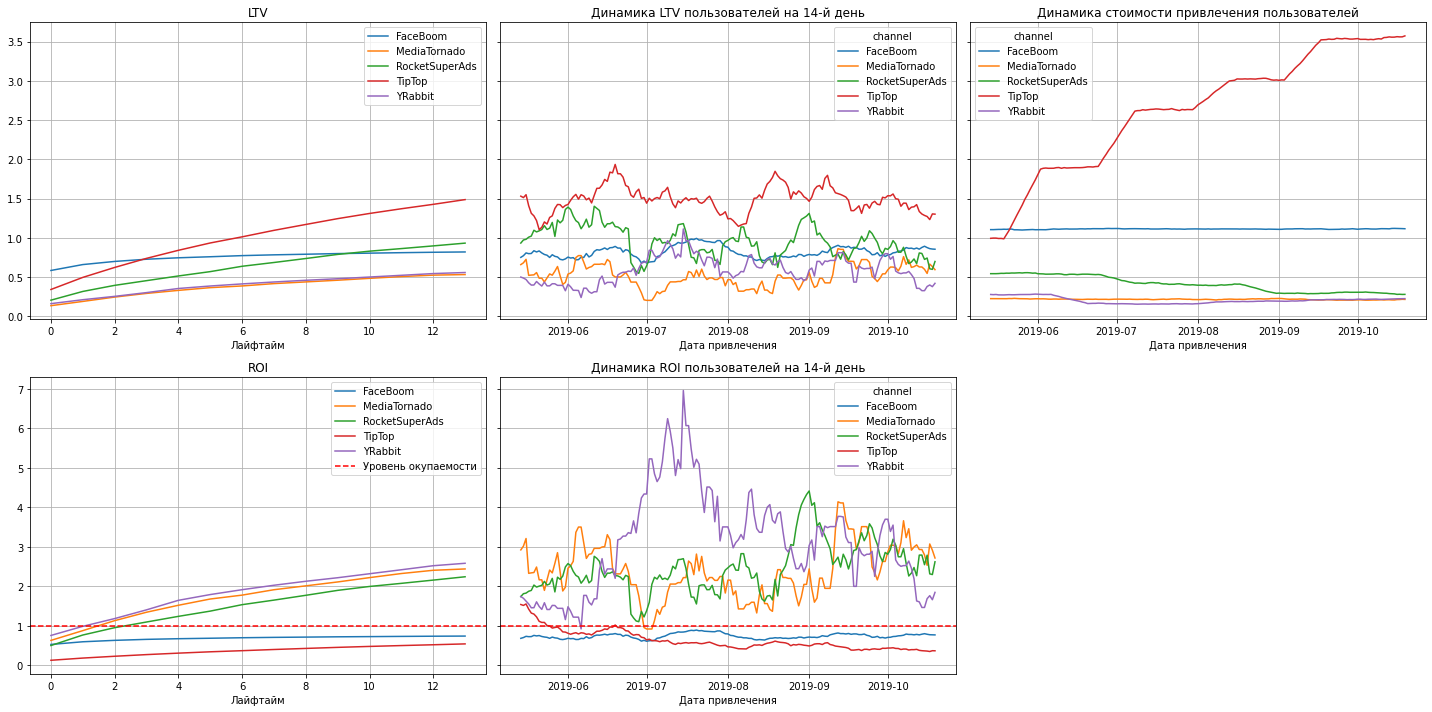

In [55]:
# посмотрим на окупаемость для США с разбивкой по каналам
profiles_usa = profiles.query('region == "United States"')
dimensions = ['channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

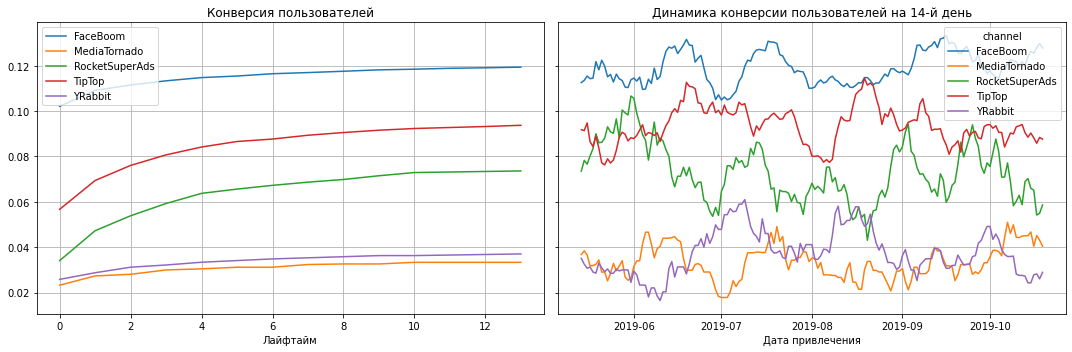

In [56]:
# смотрим конверсию для США с разбивкой по каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

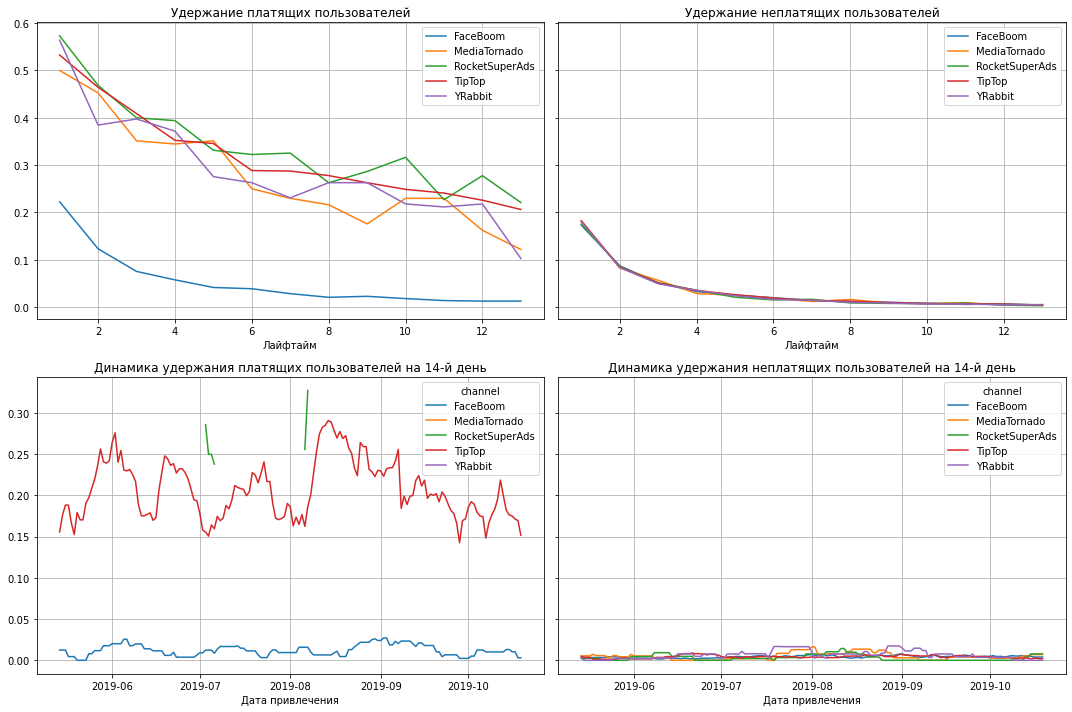

In [57]:
# смотрим удержание для США с разбивкой по каналам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)
    
plot_retention(retention_grouped, retention_history, horizon_days, window=14)

Каналы Tip Top и FaceBoom в США не окупаются, хотя конверсия по ним хорошая. У Tip Top очень высокая стоимость привлечения (проверить настройки рекламы), а у FaceBoom низкое удержание (нет ли технических проблем). Эти проблемы надо проработать, и возможно перераспределить бюджет в пользу других каналов. Например, канал RocketSuperAds показывает хорошие конверсию, удержание  и окупаемость


#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам
<a id='stage7_4'></a>

[к содержанию](#start)

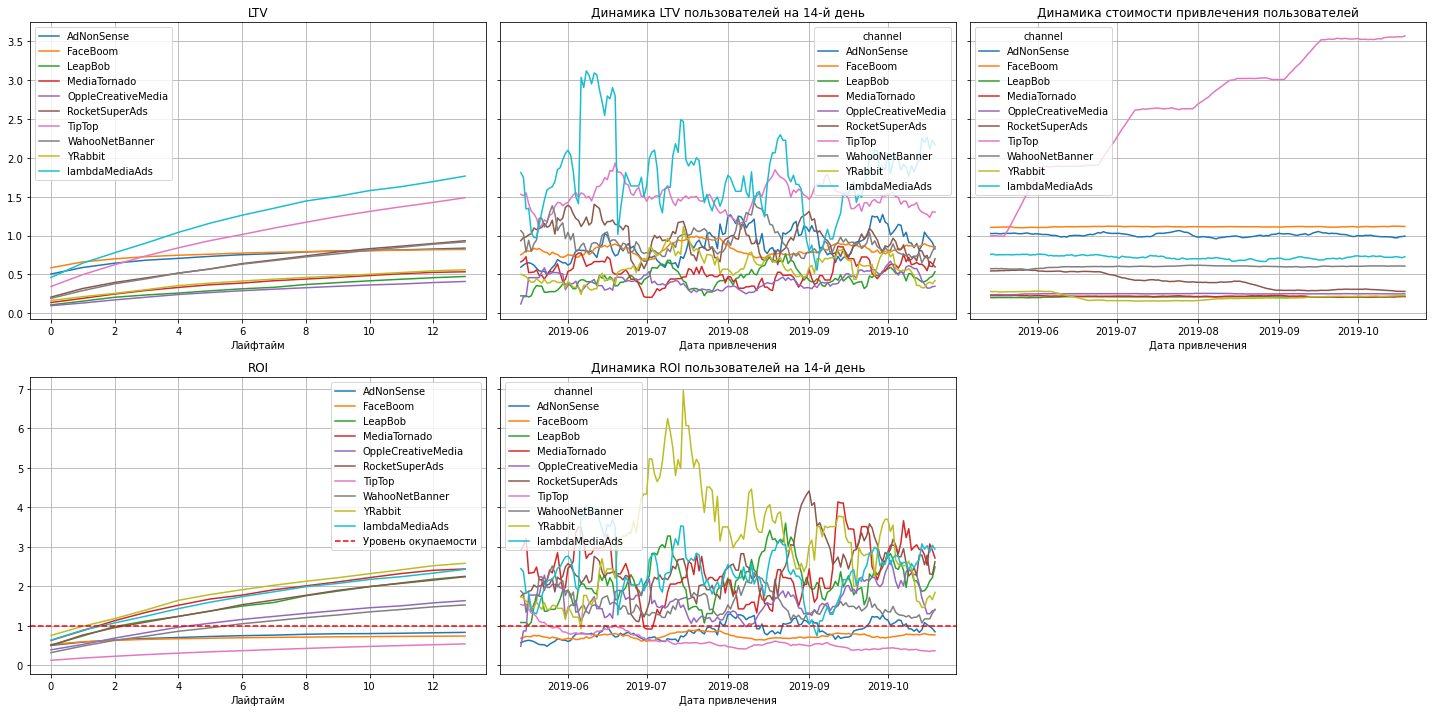

In [58]:
# смотрим окупаемость с разбивкой по каналам
dimensions = ['channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

LTV растет для всех каналов, особенно хорошо для lambdaMediaAds и Tip Top. 

Стоимость привлечения для всех каналов стабильна или падает, кроме  Tip Top - для него очень значительно растет.

Соответственно, самая низкая окупаемость у канала  Tip Top - видимо, стоимость привлечения растет быстрее, чем платежи клиентов. Так же не окупаются каналы FaceBoom и AdNonSense. Лучше всего окупается реклама для YRabbit, MediaTornado, lambdaMediaAds и RocketSuperAds.

#### Вывод:
<a id='stage7_5'></a>

[к содержанию](#start)

Итак, LTV растет для всех устройств, стран и каналов, как и в общем по рекламной кампании. 
Самый высокий LTV показывают мобильные устройства, United States и каналы lambdaMediaAds и Tip Top

Но реклама, направленная на привлечение пользователей в целом, не окупается (окупаемость инвестиций чуть выше 80%, причем в динамике снижается пропорционально увеличению стоимости привлечения). Стоимость привлечения в общем по рекламной кампании растет. Значит рекламный бюджет постоянно приходится увеличивать, а объем продаж растет недостаточно быстро, чтобы реклама окупалась.

Из устройств окупается лишь PC, а Mac, iPhone и Android - нет. Это подтверждает и динамика ROI, хотя в начале периода наблюдения были моменты, когда мобильные устройства тоже окупались, а к концу периода наблюдения (начиная с июня-июля) все устройства, включая РС, опустились ниже уровня окупаемости. Видимо, это связано с тем, что стоимость привлечения для iPhone и Mac растет быстрее всего, у Android средняя стоимость привлечения, а у PC - самая низкая.

Если смотреть по странам, то United States не окупается, а стоимость привлечения в нем значительно растет. Великобритания, Германия и Франция окупаются.

Самая низкая окупаемость у канала Tip Top, а стоимость привлечения для него очень сильно растет. Также не окупаются каналы FaceBoom и AdNonSense. Стоимость привлечения для них достаточно высокая, но стабильная, а вот LTV почему-то практически не растет.

Лучше всего окупается реклама для YRabbit, MediaTornado, lambdaMediaAds и RocketSuperAds.


При рассмотрении отдельно США:  
Каналы Tip Top и FaceBoom в США не окупаются, хотя конверсия по ним хорошая. У Tip Top очень высокая стоимость привлечения (проверить настройки рекламы), а у FaceBoom низкое удержание (нет ли технических проблем). Эти проблемы надо проработать, и возможно перераспределить бюджет в пользу других каналов. Например, канал RocketSuperAds показывает хорошие конверсию, удержание и окупаемость

### Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам
<a id='stage_8'></a>

[к содержанию](#start)

Чем могут быть вызваны проблемы окупаемости? Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

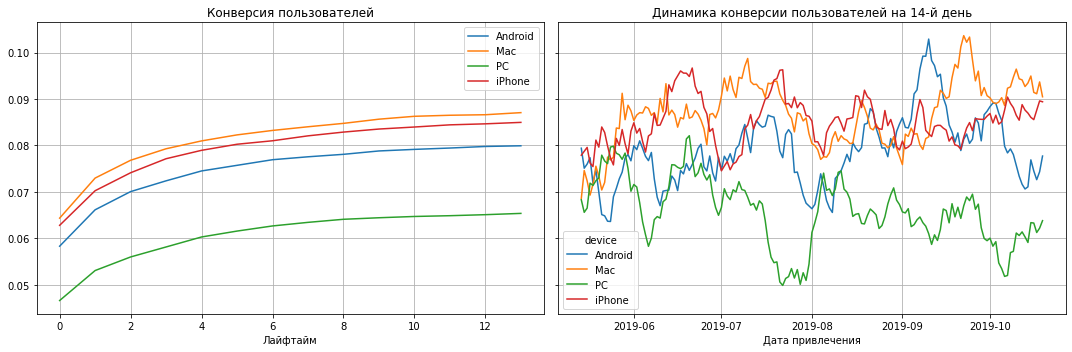

In [59]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

По устройствам пользователи конвертируются хорошо, хотя РС хуже чем остальные.

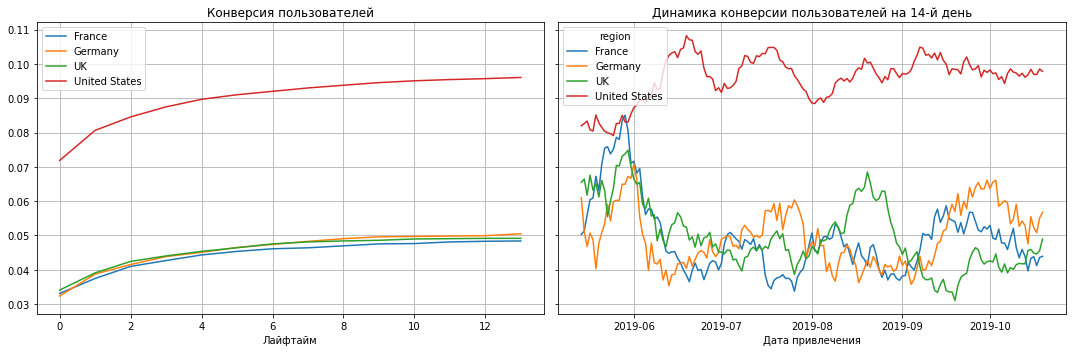

In [60]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Конверсия для всех стран постепенно растет, для США - самая высокая. Судя по динамике, в июне конверсия для Великобритании, Германии и Франции почему-то резко упала, а для США - выросла.

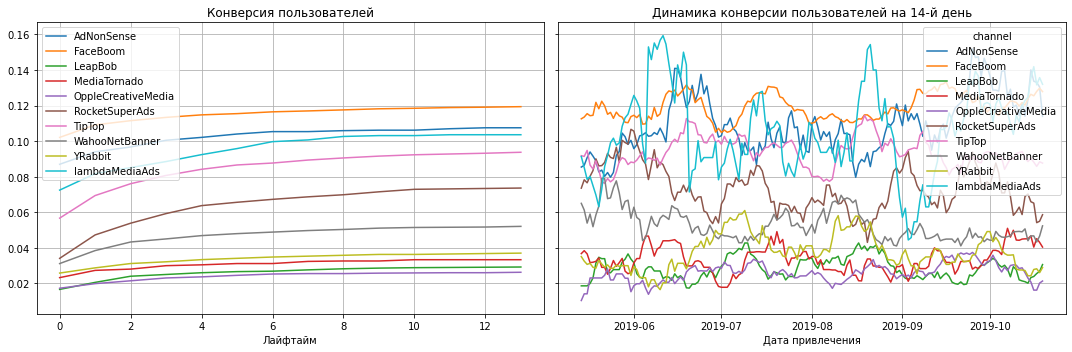

In [61]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

В общем конверсия по каналам достаточно стабильна. Самая высокая конверсия у FaceBoom, AdNonSense, lambdaMediaAds и Tip Top. А вот у YRabbit, MediaTornado, LeapBob и OppleCreativeMedia - самая низкая.

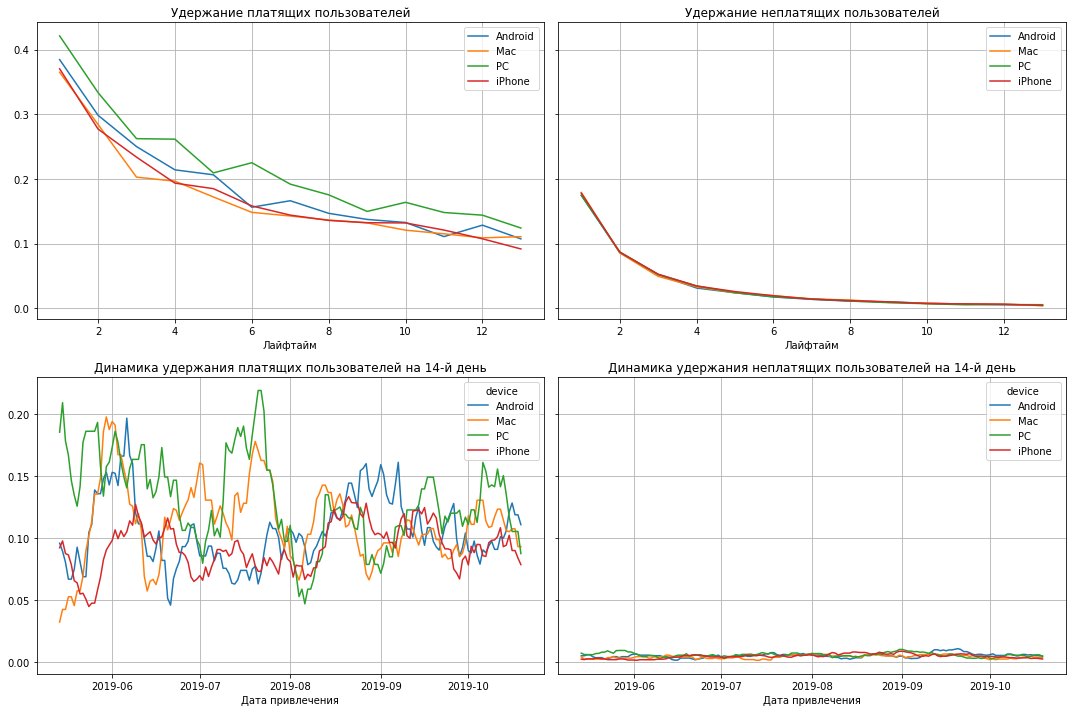

In [62]:
# смотрим удержание с разбивкой по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
    
plot_retention(retention_grouped, retention_history, horizon_days, window=14)

Удержание с разбивкой по устройствам без значительных отклонений.

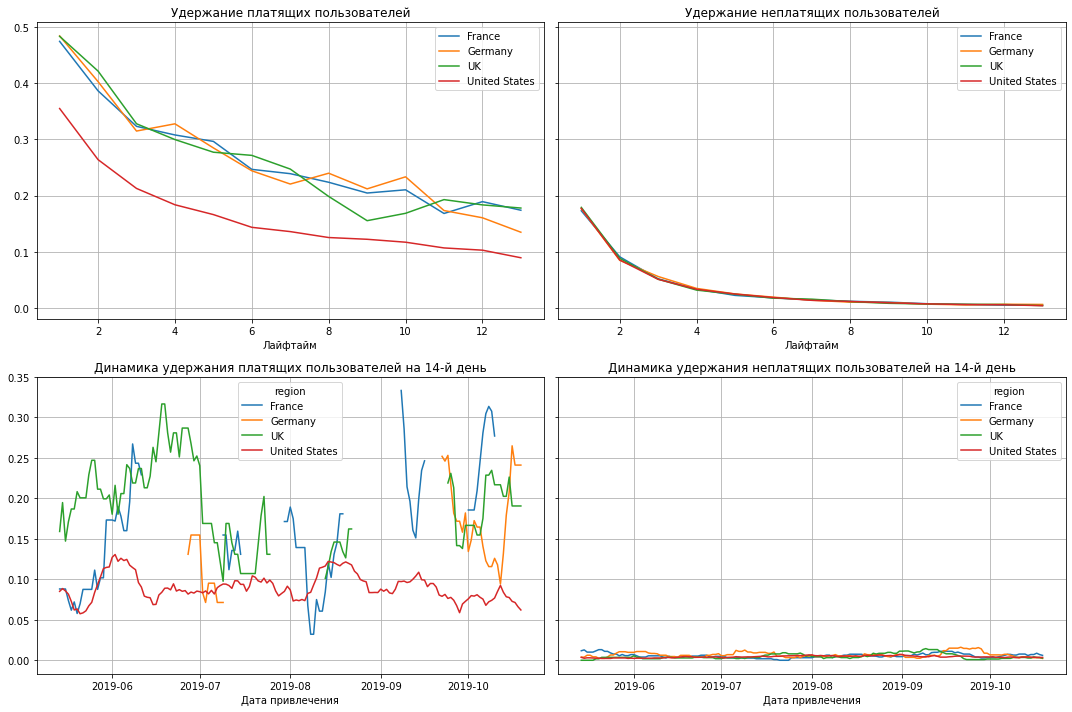

In [63]:
# смотрим удержание с разбивкой по странам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
    
plot_retention(retention_grouped, retention_history, horizon_days, window=14)

Удержание платящих пользователей для США самое низкое. 

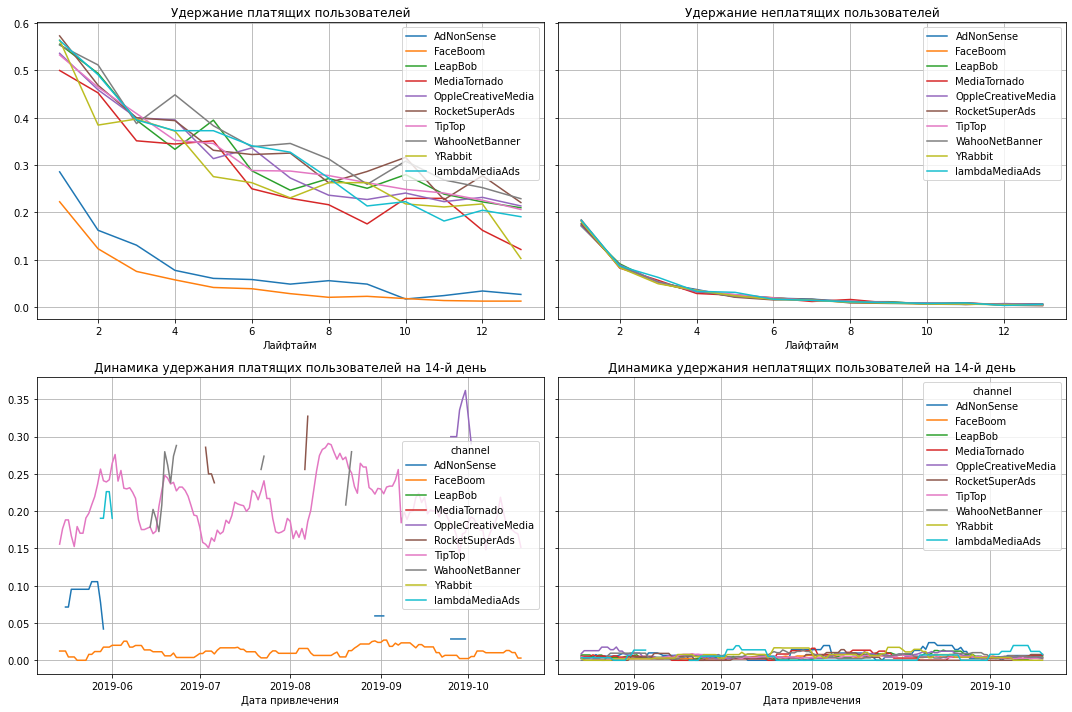

In [64]:
# смотрим удержание с разбивкой по каналам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
    
plot_retention(retention_grouped, retention_history, horizon_days, window=14)

Удержание платящих пользователей очень низкое для FaceBoom, AdNonSense.

#### Вывод: 
<a id='stage8_1'></a>

[к содержанию](#start)

По устройствам пользователи конвертируются хорошо, удержание без значительных отклонений.

Конверсия для всех стран постепенно растет, для США - самая высокая, при этом удержание платящих пользователей для США самое низкое.

Плюс, судя по динамике, в июне конверсия для Великобритании, Германии и Франции почему-то резко упала, а для США - выросла.

В общем конверсия по каналам достаточно стабильна. Самая низкая конверсия у YRabbit, MediaTornado, LeapBob и OppleCreativeMedia. Самая высокая конверсия у FaceBoom, AdNonSense, lambdaMediaAds и Tip Top. При этом удержание платящих пользователей для FaceBoom и AdNonSense очень низкое.

In [65]:
# для общих выводов посмотрим, в каких странах какие каналы привлечения используются
channel_france = profiles.query('region == "France"').groupby('channel').agg({'user_id': 'nunique'})
channel_germany = profiles.query('region == "Germany"').groupby('channel').agg({'user_id': 'nunique'})
channel_uk = profiles.query('region == "UK"').groupby('channel').agg({'user_id': 'nunique'})
channel_us = profiles.query('region == "United States"').groupby('channel').agg({'user_id': 'nunique'})
channel_region = (channel_france.merge(channel_germany, how='outer', on='channel')
.rename(columns={'user_id_x': 'france', 'user_id_y': 'germany'}))
channel_region = channel_region.merge(channel_uk, how='outer', on='channel')
channel_region = (channel_region.merge(channel_us, how='outer', on='channel').fillna(0)
.rename(columns={'user_id_x': 'uk', 'user_id_y': 'us', }))
channel_region

,france,germany,uk,us
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,0.0
LeapBob,2988.0,2519.0,3046.0,0.0
OppleCreativeMedia,2991.0,2562.0,3052.0,0.0
WahooNetBanner,2971.0,2579.0,3003.0,0.0
lambdaMediaAds,742.0,649.0,758.0,0.0
FaceBoom,0.0,0.0,0.0,29144.0
MediaTornado,0.0,0.0,0.0,4364.0
RocketSuperAds,0.0,0.0,0.0,4448.0
TipTop,0.0,0.0,0.0,19561.0


США пользуется самыми дорогими каналами. Значит, надо перераспределять бюджет в Америке и найти каналы, у которых ROI, удержание, конверсия будут неплохие.   

In [66]:
# для общих выводов посмотрим, для каких устройств какие каналы привлечения используются
channel_andr = profiles.query('device == "Android"').groupby('channel').agg({'user_id': 'nunique'})
channel_mac = profiles.query('device == "Mac"').groupby('channel').agg({'user_id': 'nunique'})
channel_pc = profiles.query('device == "PC"').groupby('channel').agg({'user_id': 'nunique'})
channel_iphone = profiles.query('device == "iPhone"').groupby('channel').agg({'user_id': 'nunique'})
channel_device = (channel_andr.merge(channel_mac, how='outer', on='channel')
.rename(columns={'user_id_x': 'andr', 'user_id_y': 'mac'}))
channel_device = channel_device.merge(channel_iphone, how='outer', on='channel')
channel_device = (channel_device.merge(channel_pc, how='outer', on='channel').fillna(0)
.rename(columns={'user_id_x': 'iphone', 'user_id_y': 'pc'}))
channel_device['mobile'] = channel_device['andr'] + channel_device['mac'] + channel_device['iphone']
channel_device

,andr,mac,iphone,pc,mobile
channel,,,,,
AdNonSense,1109,410,798,1563,2317
FaceBoom,5875,7265,12996,3008,26136
LeapBob,2580,880,1691,3402,5151
MediaTornado,879,1105,1927,453,3911
OppleCreativeMedia,2526,882,1701,3496,5109
RocketSuperAds,928,1137,1917,466,3982
TipTop,3889,4820,8840,2012,17549
WahooNetBanner,2577,856,1711,3409,5144
YRabbit,865,1097,1868,482,3830


### Общие выводы

<a id='stage_9'></a>

[к содержанию](#start)

В результате проведенного исследования мы можем сказать, что реклама, направленная на привлечение пользователей в целом, не окупается (окупаемость инвестиций чуть выше 80%, причем в динамике снижается пропорционально увеличению стоимости привлечения). LTV стабилен, а стоимость привлечения в общем по рекламной кампании растет. Значит, рекламный бюджет постоянно приходится увеличивать, а объем продаж растет недостаточно быстро, чтобы реклама окупалась.

Проблемы в привлечении пользователей:

    1. США - низкое удержание пользователей. 

    Если смотреть по странам, то США дают больше всего платящих пользователей (6,9%), показывают самый высокий LTV и конверсию. При этом США не окупаются, стоимость привлечения в них значительно растет, а удержание пользователей самое низкое. 
    Каналы Tip Top и FaceBoom в США не окупаются, хотя конверсия по ним хорошая. У Tip Top очень высокая стоимость привлечения, а у FaceBoom низкое удержание.

    2. Падение конверсии для Великобритании, Германии и Франции после июня.

    Судя по динамике конверсии, в июне конверсия для Великобритании, Германии и Франции почему-то резко упала, а для США - выросла. До июня конверсия во всех странах стабильно росла.

    3. Падение окупаемости для мобильных устройств с июня.

    Мобильные устройства приносят больше платящих клиентов, чем PC (Mac (6,36%), iPhone (6,21%), Android (5,85%), PC 5,05%) и показывают самый высокий LTV, но при этом не окупаются, окупается лишь PC. Стоимость привлечения для iPhone и Mac растет быстрее всего, у Android средняя стоимость привлечения, а у PC - самая низкая. Судя по динамике ROI для устройств, в начале периода наблюдения были моменты, когда все устройства окупались, а начиная с июня и к концу периода наблюдения все устройства, включая РС, опустились ниже уровня окупаемости. Конверсия и удержание без аномалий.

    4. Рост стоимости привлечения покупателей для канала TipTop.

    Канал TipTop в лидерах по количеству платящих пользователей - 9,6%. Канал показывает один из самых высоких LTV и конверсию. При этом он самый затратный, на него потрачено 51,9% рекламного бюджета, а стоимость привлечения одного покупателя самая высокая - 2,8. В динамике его рекламный бюджет постепенно увеличивается, причем в него изначально вкладывалось больше средств, чем в другие каналы привлечения. Канал не окупается (самая низкая окупаемость).

    5. Низкое удержание пользователей для FaceBoom и AdNonSense.

    Также много платящих пользователей приносят каналы FaceBoom (12,2%) и AdNonSense (11,34%), у них одна из самых высоких конверсий. 

    При этом они также одни из самых дорогих - на FaceBoom потрачено 30,76% рекламного бюджета, стоимость привлечения одного покупателя 1,11, на AdNonSense потрачено 11,34%, стоимость покупателя 1,01. В динамике  рекламный бюджет для канала FaceBoom постепенно увеличивается.

    Каналы FaceBoom и AdNonSense не окупаются. Стоимость привлечения для них достаточно высокая, но стабильная, LTV практически не растет. Удержание платящих пользователей для FaceBoom и AdNonSense очень низкое.

Возможные причины проблем и рекомендации для повышения эффективности рекламной кампании:

    1. Проверить, нет ли технических проблем у пользователей из США, возможно с этим связано низкое удержание. Возможно, есть конкуренты, приложение которых более удобное/дешевое/т.п.
    Возможно, стоит перераспределить бюджет в пользу других каналов. Например, канал RocketSuperAds показывает хорошие конверсию, удержание и окупаемость

    2. Проверить, как изменились настройки рекламных кампаний и не было ли обновлений приложения в июне. Что могло повлиять на динамику конверсии для США и остальных стран, а также на динамику окупаемости для устройств. Возможно, изменились условия привлечения (акции, бонусы), или обновленние приложения затронуло не все регионы и по-разному на них повлияло.

    3. Проверить настройки рекламы для канала TipTop, выяснить, почему у него очень высокая стоимость привлечения. Возможно, стоит изменить способ оплаты рекламы.

    4. Проверить, нет ли технических проблем у пользователей с каналов FaceBoom и AdNonSense при использовании приложения, почему низкое удержание и не растет LTV. Возможно, есть проблемы с оплатой в приложении.
